<a href="https://colab.research.google.com/github/Pranav0707/LetsGrowMore_DataScience_Projects/blob/main/Stock_Market_Prediction_and_Forecasting_using_stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task2:-Stock Market Prediction And Forecasting Using Stacked LSTM**

**Name:-Pranav Tanaji Khot**




In [1]:
import numpy as np
import numpy
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
data.dtypes


Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [8]:
#Creating new dataframe containing only date and close feature as these two are important 
data = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Close'])
for i in range(0,len(data)):
    new_data['Close'][i] = data['Close'][i]

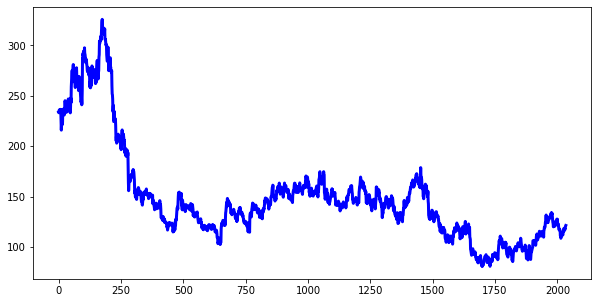

In [9]:
#setting the index for date column
plt.figure(figsize = (10,5))
plt.plot(new_data['Close'],color='blue',linewidth=3.0)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(new_data).reshape(-1,1))
#creating train and test sets
set_size = int(len(data)*0.5)
train = scaled_data[0:set_size,:]
test = scaled_data[set_size:,:]

In [11]:
#Now creating our dataset for x_train and y_train, x_test and y_test 
def create_dataset(dataset, time_step):
    x, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(x), np.array(y)

In [12]:
time_step = 100
X_train, Y_train = create_dataset(train, time_step)
X_test, Y_test = create_dataset(test, time_step)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_train=np.asarray(X_train).astype(np.float64)
Y_train=np.asarray(Y_train).astype(np.float64)

In [14]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train, Y_train, epochs=1, batch_size=1, verbose=2)

916/916 - 62s - loss: 0.0048 - 62s/epoch - 68ms/step


In [15]:
#Now making prediction
X_test=np.asarray(X_test).astype(np.float64)
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Text(0, 0.5, 'Closing price')

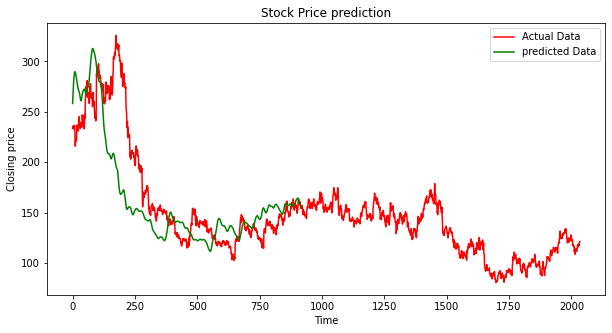

In [16]:
plt.figure(figsize=(10,5))
plt.plot(new_data['Close'],color='red',label='Actual Data')
plt.plot(train_predict,color='Green',label = 'predicted Data')
plt.legend()
plt.title("Stock Price prediction")
plt.xlabel('Time')
plt.ylabel('Closing price')